### 1 Introduction

This assignment aims to compare the performance of various image smoothing filters applied to noisy images. The filters under consideration include simple smoothing filters such as Box filter, Gaussian filter, and Median filter, as well as advanced filters like Bilateral filter and Adaptive Median filter. The evaluation will focus on noise removal effectiveness, edge preservation, computational efficiency, and the influence of kernel size on the performance of each filter. Quantitative metrics such as Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) will be used for comparison.

#### Filters to be Used:

1. **Box Filter**:
   - Averages the pixel values within a defined kernel size, effective for noise reduction but can blur edges.

2. **Median Filter**:
   - Replaces each pixel with the median value of its neighboring pixels, effective for removing salt-and-pepper noise while preserving edges.

3. **Gaussian Filter**:
   - Applies a Gaussian function to the neighboring pixels, smoothing the image while preserving edges better than the Box filter.

4. **Bilateral Filter**:
   - Considers both spatial distance and intensity difference between pixels, smoothing the image while preserving edges by combining Gaussian smoothing in both spatial and intensity domains.

5. **Adaptive Median Filter**:
   - Adapts the size of the filtering window based on local image characteristics, effectively removing noise while preserving edges and fine details.

The comparison of these filters will provide insights into their strengths and weaknesses in different aspects of image processing, highlighting their suitability for various applications.

In [1]:
import cv2
import matplotlib.pyplot as plt
import utilities as utils
import numpy as np
import os
import metrics
import filters
import visualization as vis
from sklearn.metrics import mean_squared_error


erge

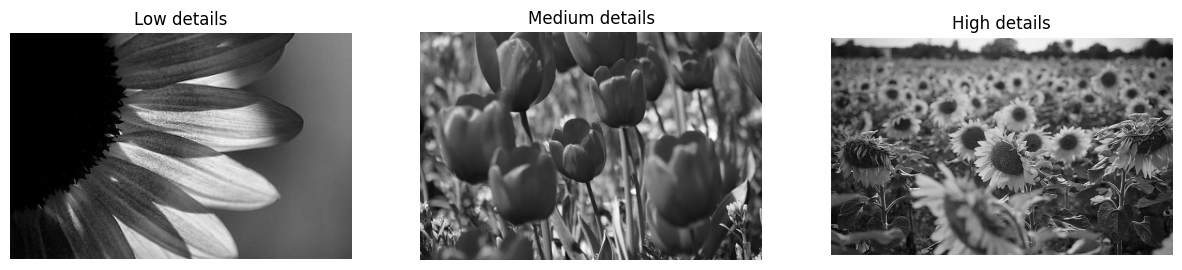

In [2]:
list_of_images = []
PATH = 'images'

images_dir = os.listdir(PATH)
images_dir.sort()

# Iterate over images
for images in images_dir:  # Taking first 10 images for example
    image = cv2.imread(os.path.join(PATH, images), cv2.IMREAD_GRAYSCALE)
    list_of_images.append(image)

titles = ["Low details", "Medium details", "High details"]
    
vis.plot_images(list_of_images, titles)

In [3]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

In [4]:
kernel_sizes = [(2*i + 1) for i in range(1, 10)]

In [ ]:
# Iterate over all images and save in a tree structured directory

utils.create_or_replace_dir('Images_filtered')


for i in range(len(dataframes)):
    filters.save_filtered_images(dataframes[i], f'image_{i}', kernel_sizes=kernel_sizes)

In [ ]:
base_dir = 'Images_filtered'
original_image_name = 'image_0'
noise_levels = os.listdir(os.path.join(base_dir, original_image_name))
noise_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0]))
filter_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0], noise_types[0]))

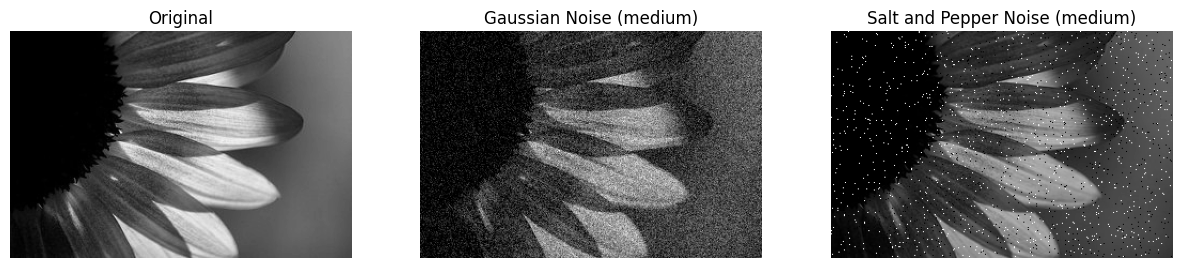

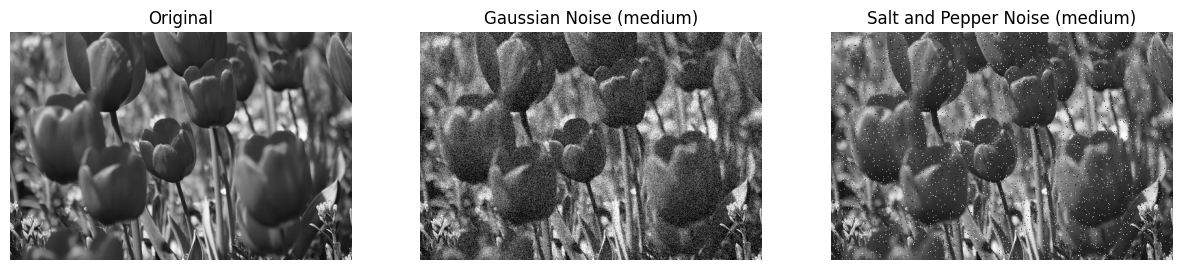

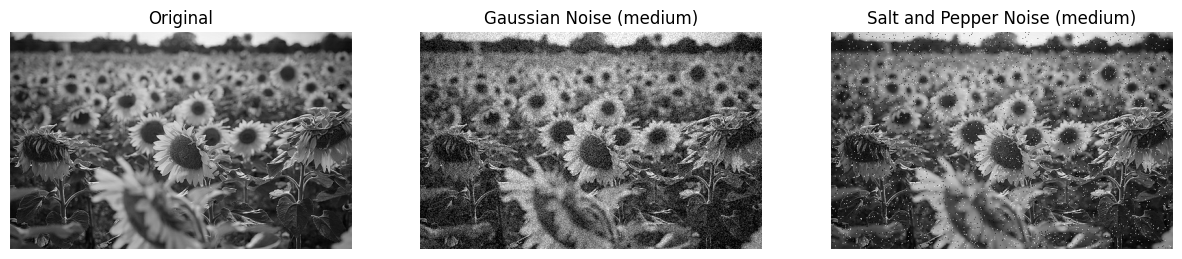

In [ ]:
# Define the noise types to display

noise_types = ['Gaussian Noise (medium)', 'Salt and Pepper Noise (medium)']

# Iterate over all images
for i, image in enumerate(list_of_images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Display the noisy variants
    for j, noise_type in enumerate(noise_types):
        noisy_image = dataframes[i].loc[noise_type, 'Image']
        axes[j + 1].imshow(noisy_image, cmap='gray')
        axes[j + 1].set_title(noise_type)
        axes[j + 1].axis('off')
    
    plt.show()

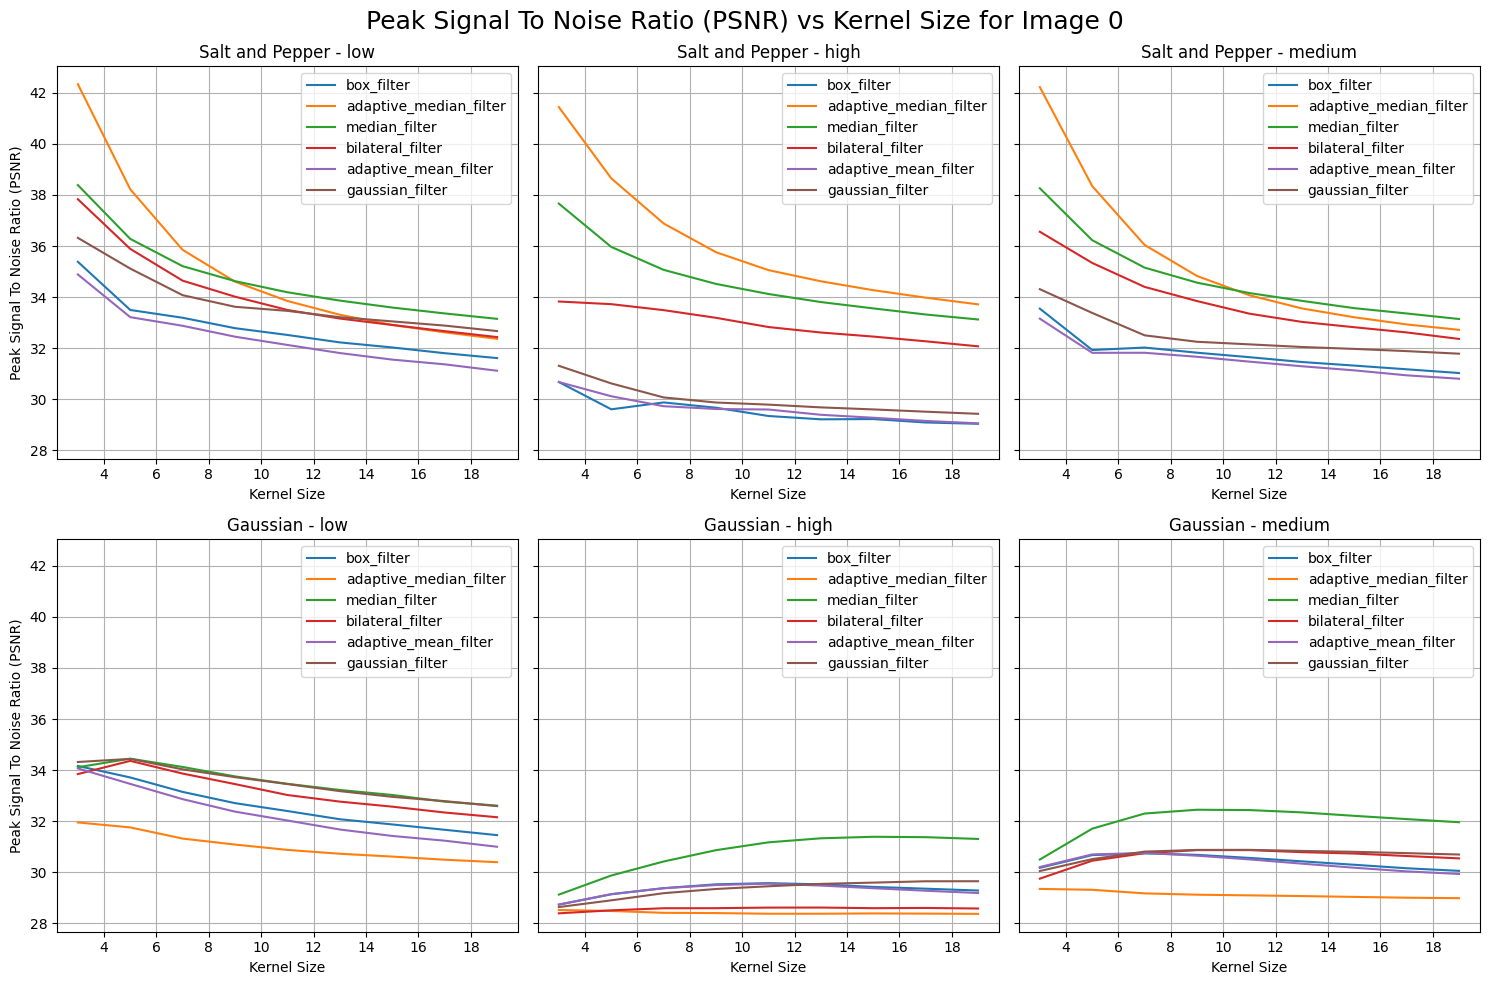

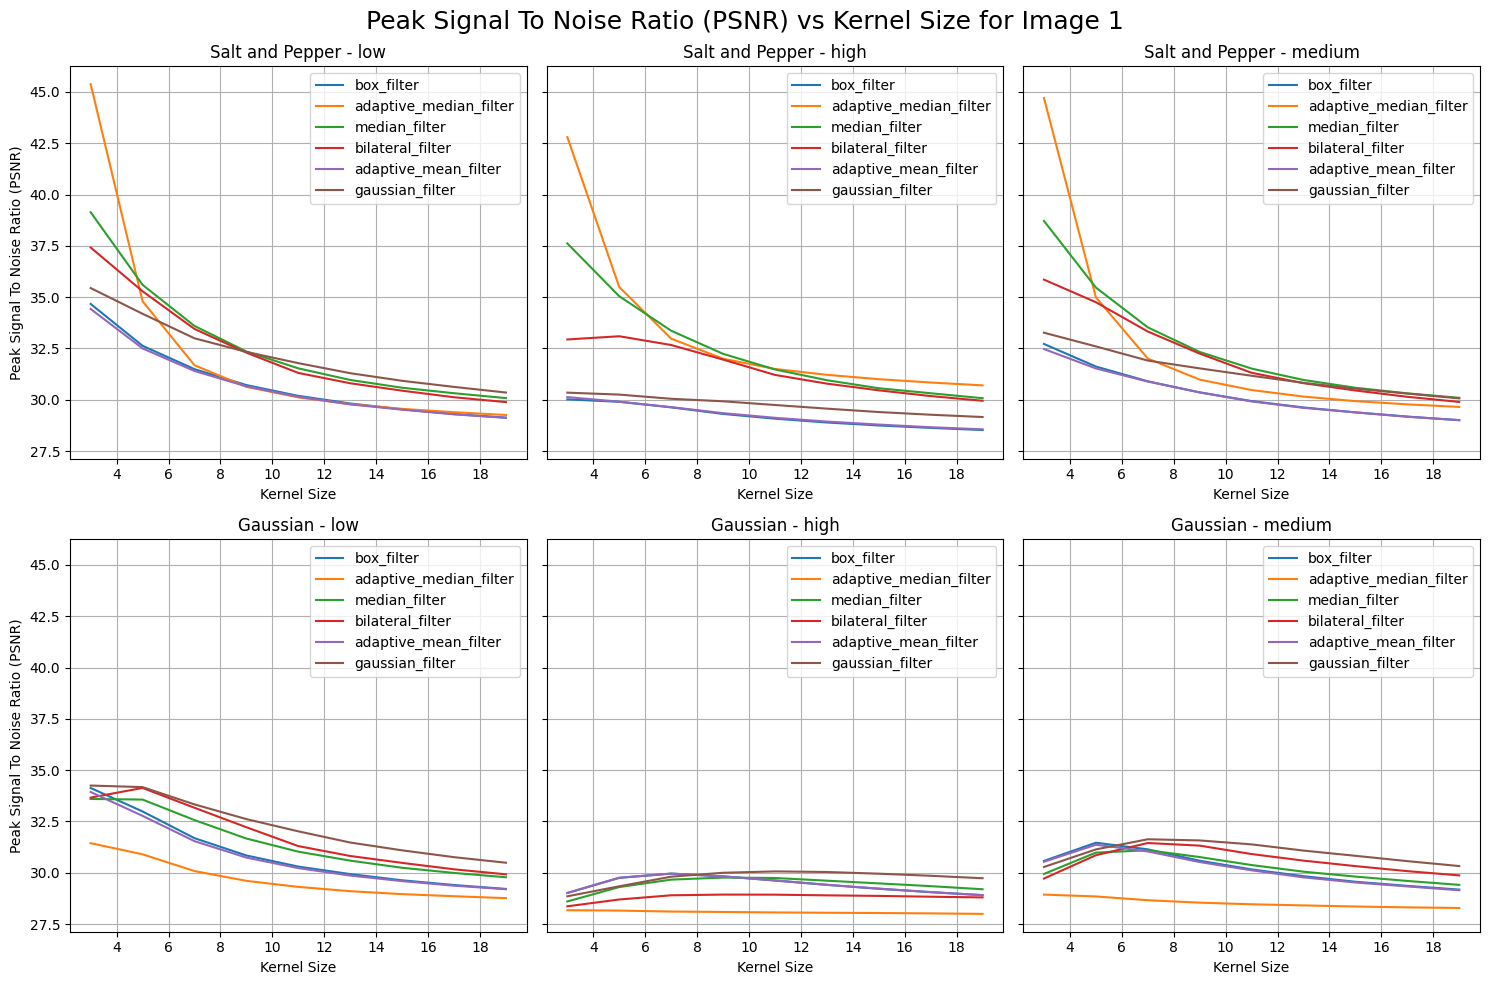

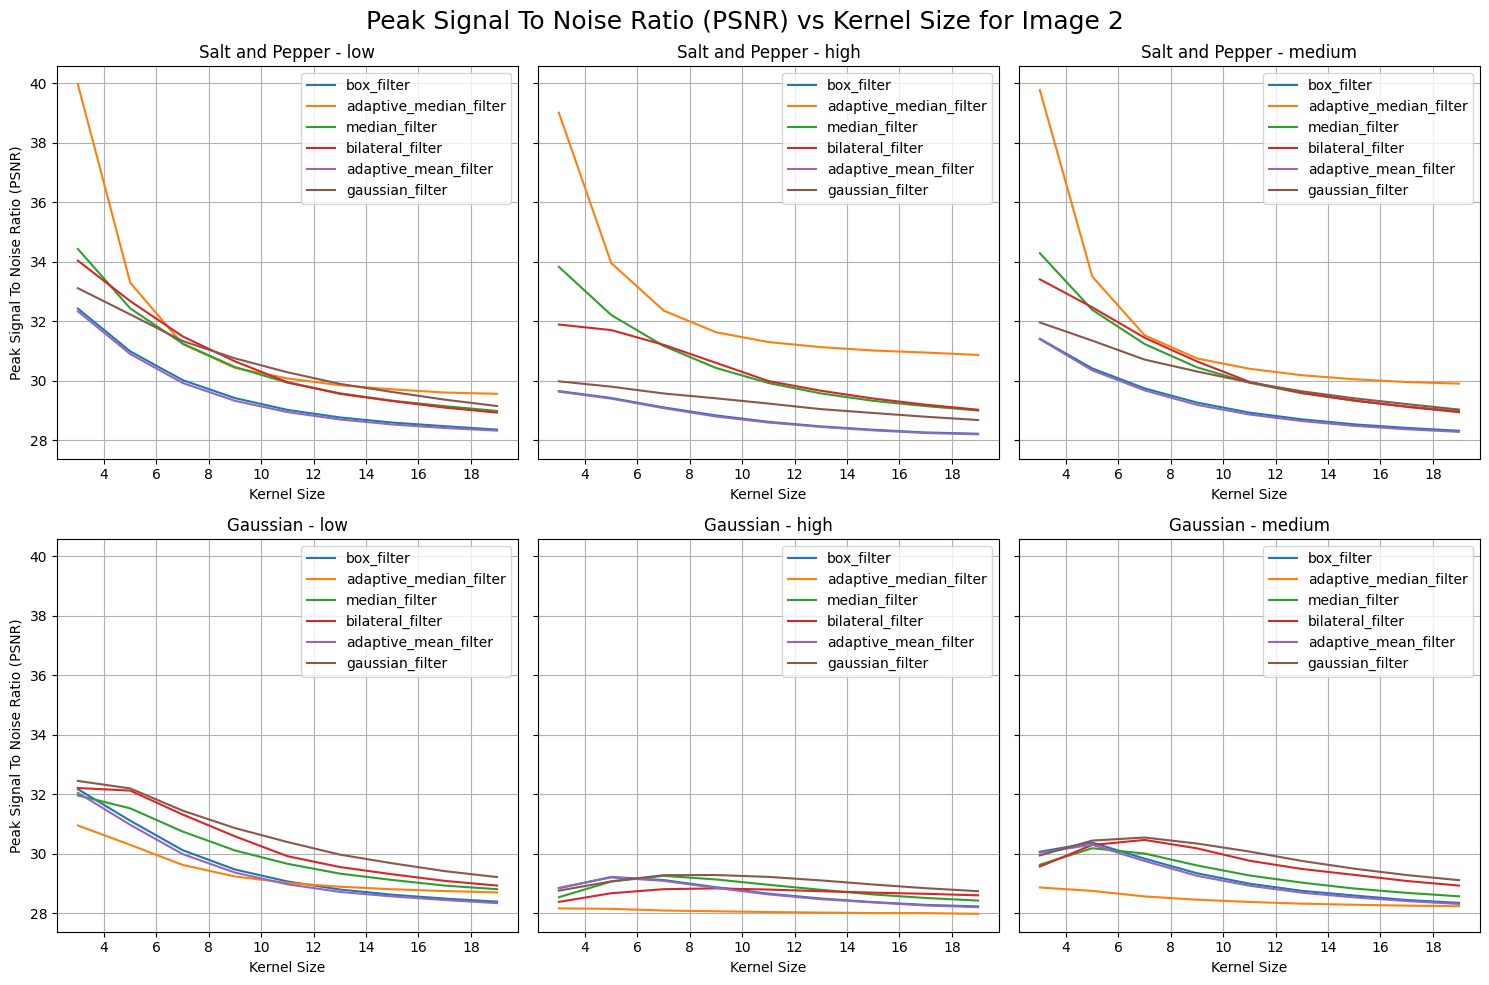

In [ ]:
for i in range(len(dataframes)):


  original_image_name = f'image_{i}'
  original_image = dataframes[i].loc['no_noise', 'Image']
    
  psnr_dict_outer, kernels = metrics.collect_metric_values_for_all_filters_and_noise_types(metrics.calculate_psnr,
                                                                                        base_dir,
                                                                                        original_image_name,
                                                                                        original_image
                                                                                      )

  vis.plot_metric_vs_kernel(psnr_dict_outer,
                            'Peak Signal To Noise Ratio (PSNR)',
                            noise_levels, filter_types,
                            kernels,
                            i  
                            )

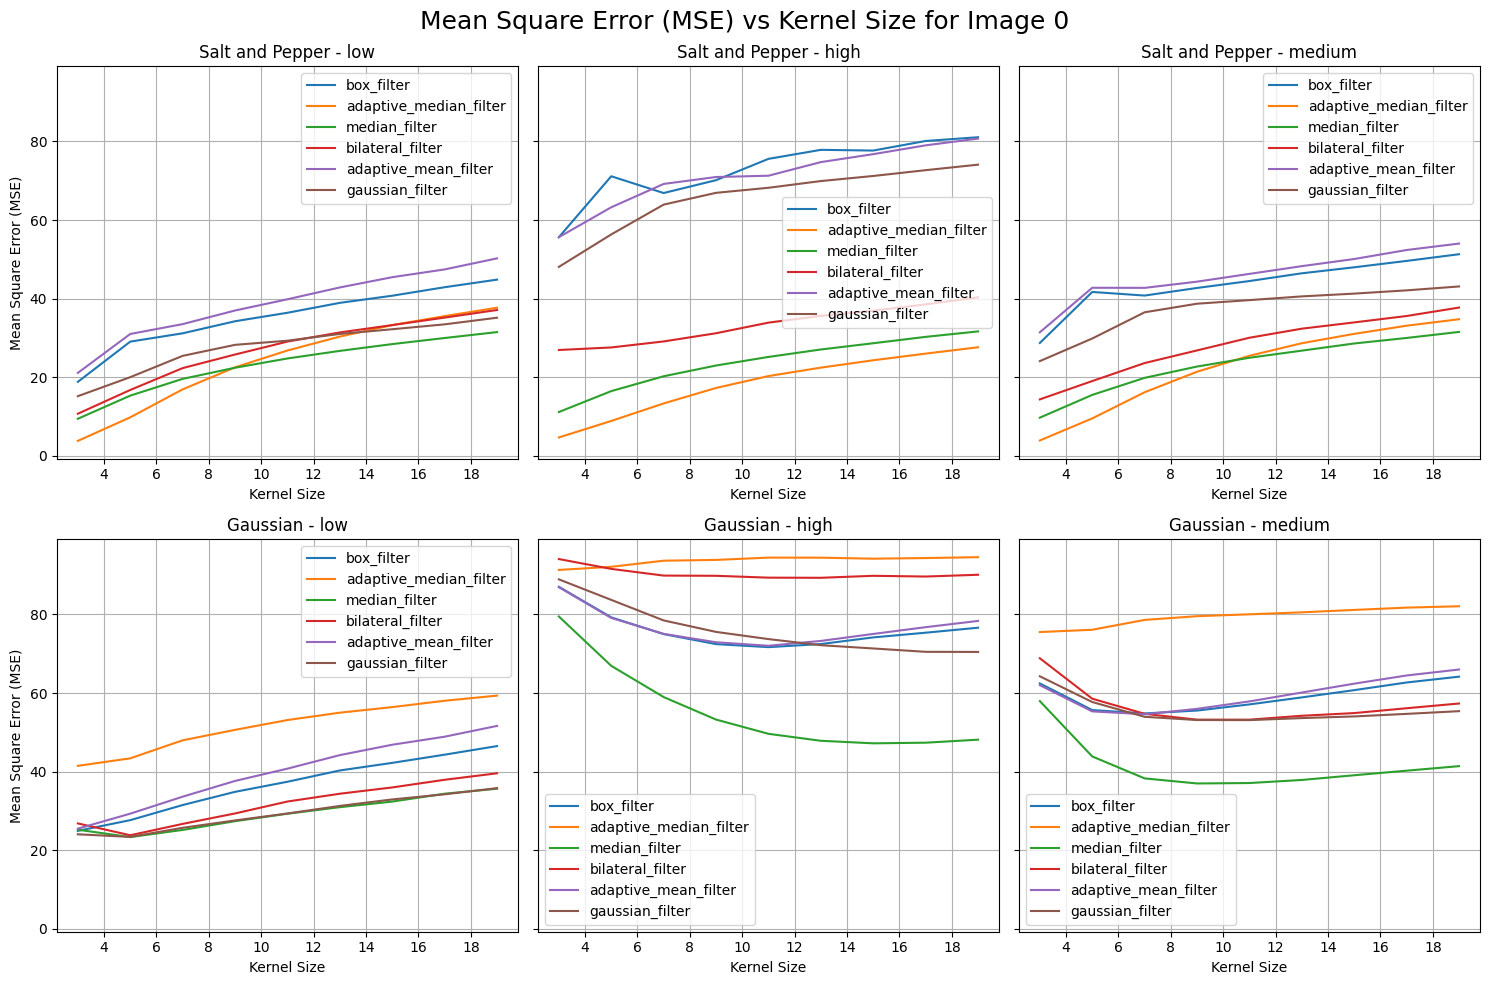

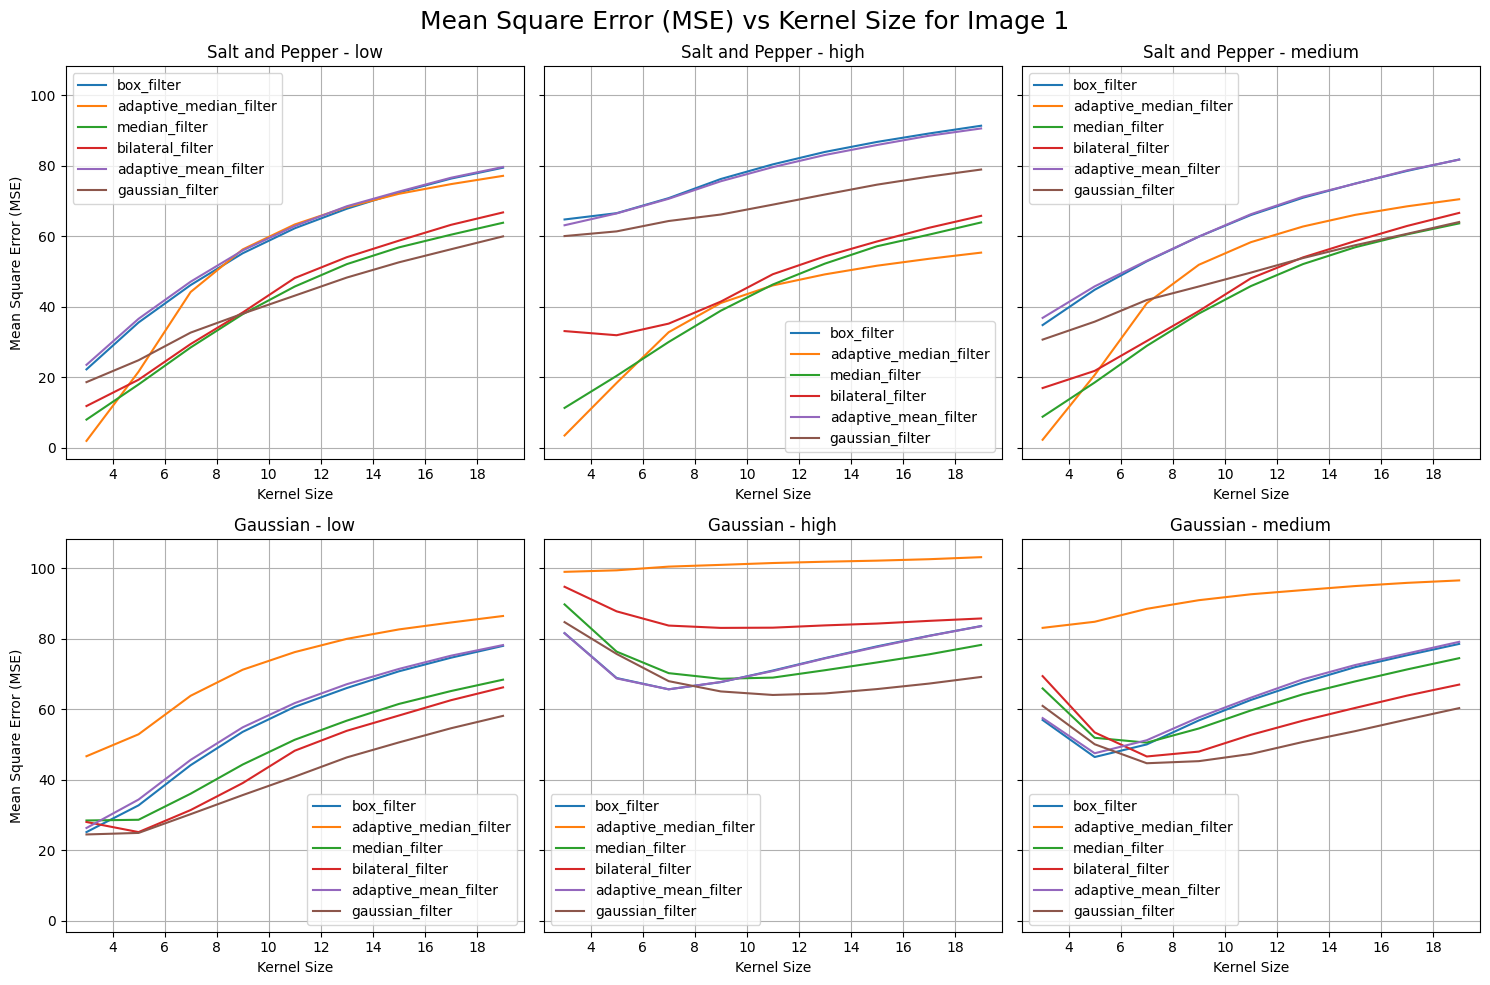

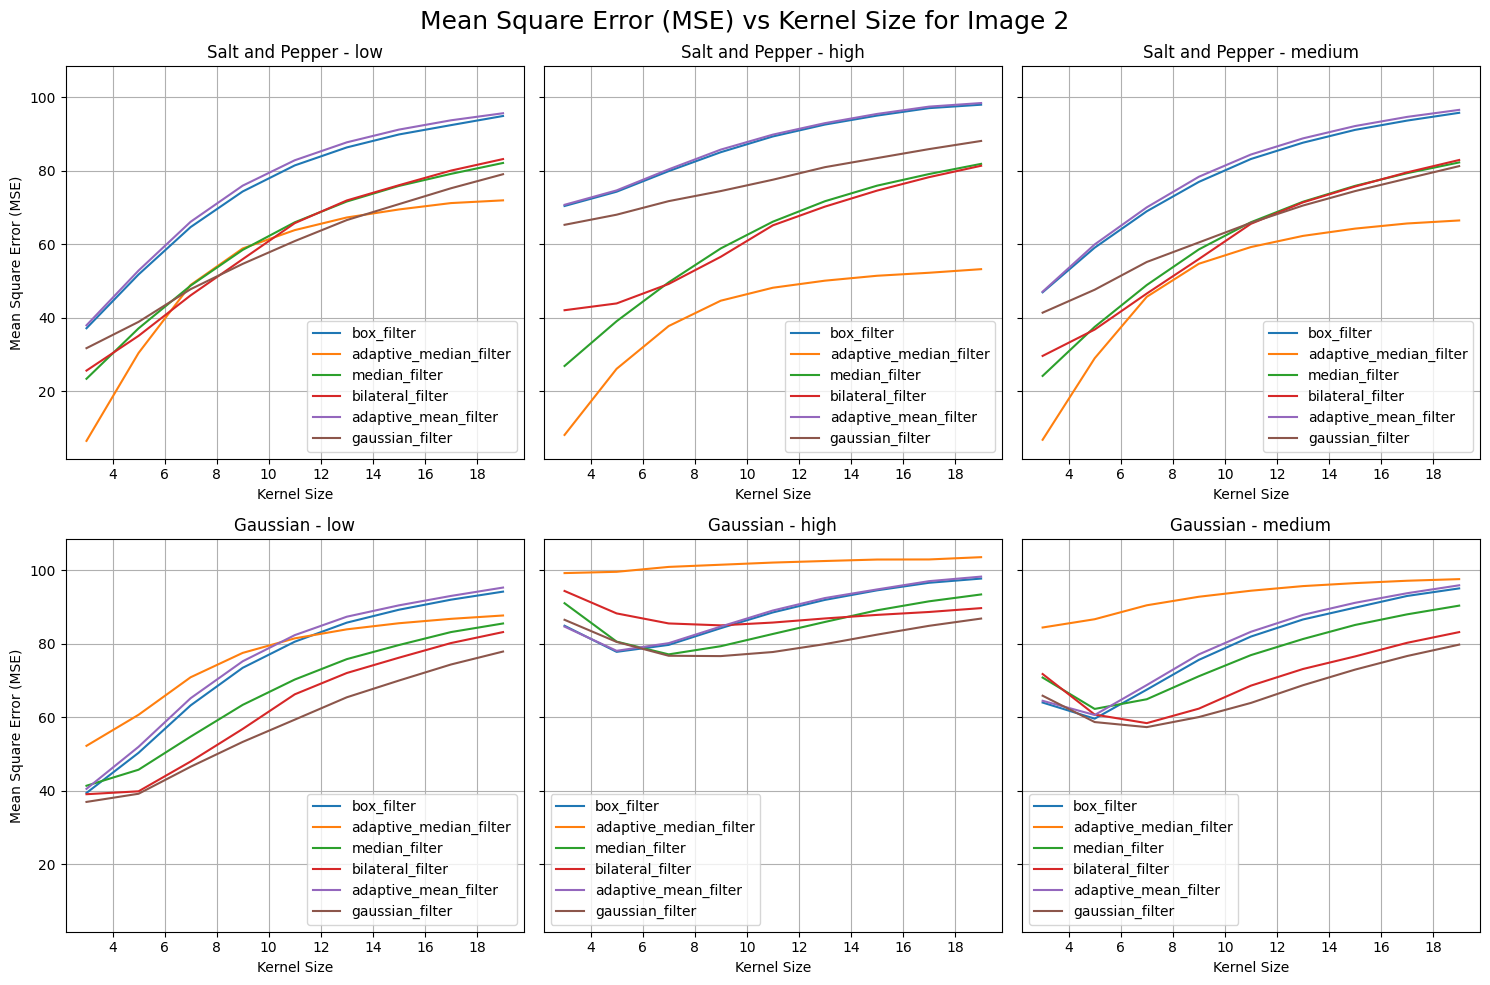

In [ ]:
for i in range(len(dataframes)):

    original_image_name = f'image_{i}'
    original_image = dataframes[i].loc['no_noise', 'Image']
    

    mse_dict_outer, kernels = metrics.collect_metric_values_for_all_filters_and_noise_types(mean_squared_error, 
                                    base_dir, 
                                    original_image_name, 
                                    original_image,
                                )

    vis.plot_metric_vs_kernel(mse_dict_outer,'Mean Square Error (MSE)', noise_levels, filter_types, kernels, i)

In [ ]:
image = dataframes[0].loc['no_noise', 'Image']
times = metrics.collect_filter_times(image, filter_types, kernel_sizes=kernel_sizes)

times.set_index(['Filter Type', 'Kernel Size'], inplace=True)

df_unstacked = times['Time'].unstack(level=0)

df_unstacked


Filter Type,adaptive_mean_filter,adaptive_median_filter,bilateral_filter,box_filter,gaussian_filter,median_filter
Kernel Size,,,,,,
3,1.677593,1.501740,0.000772,0.000624,0.000193,0.000163
5,1.528757,1.908700,0.000898,0.000068,0.000071,0.000894
7,1.476726,2.263227,0.002617,0.000162,0.000125,0.002079
9,1.519783,2.465828,0.004493,0.000345,0.000159,0.002456
11,1.626052,2.748269,0.007232,0.000189,0.000206,0.002830
13,1.527485,2.825292,0.010263,0.000118,0.000253,0.003213
15,1.649615,3.366563,0.013282,0.000102,0.000306,0.003590
17,1.683600,3.519195,0.017882,0.000102,0.000360,0.001351
19,1.669165,3.845779,0.022824,0.000112,0.000489,0.001331


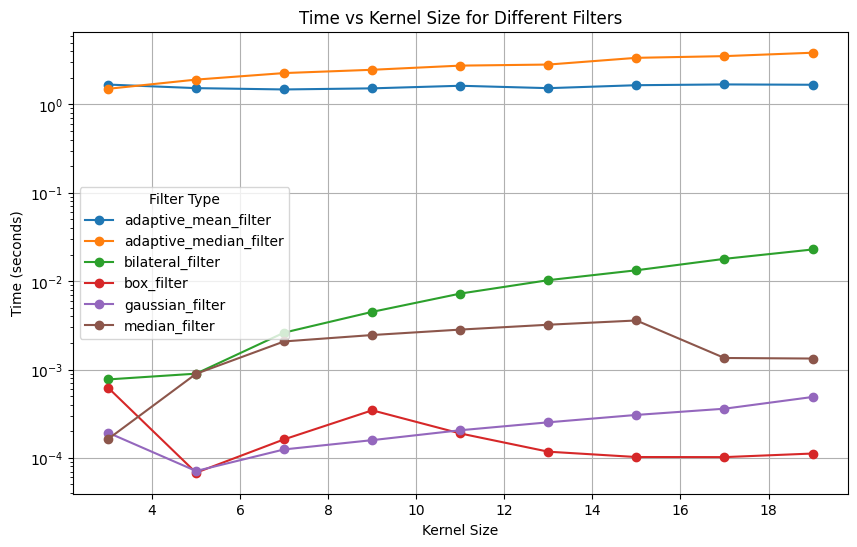

In [ ]:
vis.plot_time_vs_kernel(times);

In [ ]:
image = dataframes[0].loc['Gaussian Noise (high)', 'Image']
times = metrics.collect_filter_times(image, filter_types, kernel_sizes=kernel_sizes)

times.set_index(['Filter Type', 'Kernel Size'], inplace=True)

df_unstacked = times['Time'].unstack(level=0)

df_unstacked

Filter Type,adaptive_median_filter,bilateral_filter,box_filter,gaussian_filter,median_filter
Kernel Size,,,,,
3,1.443267,0.000366,0.001230,0.000599,0.000149
5,1.740930,0.000917,0.000057,0.000513,0.000859
7,2.333258,0.002605,0.000105,0.000632,0.002737
9,1.715863,0.004469,0.000108,0.000715,0.002977
11,1.921957,0.007313,0.000196,0.000777,0.003489
13,2.134650,0.009997,0.000112,0.000807,0.003798
15,2.185593,0.013208,0.000112,0.000474,0.003618
17,2.549824,0.017913,0.000112,0.000620,0.001943
19,2.499118,0.027283,0.000107,0.000850,0.001718


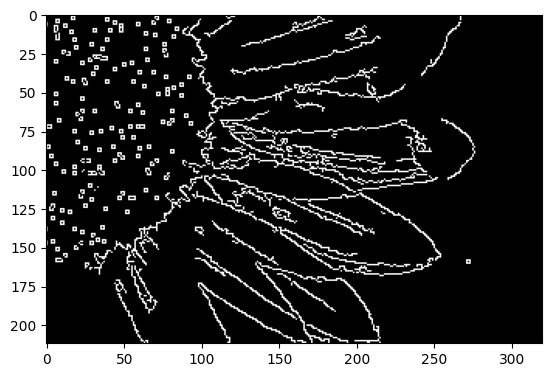

In [ ]:
image = cv2.imread('Images_filtered/image_0/medium/Salt and Pepper/adaptive_median_filter/image_0_Salt and Pepper_medium_adaptive_median_filter_k7.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, 50, 150)
plt.imshow(edges, cmap='gray')

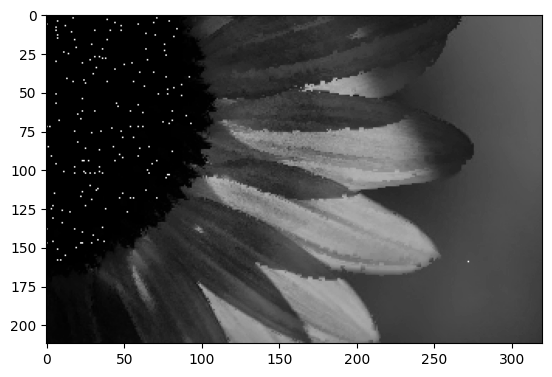

In [ ]:
plt.imshow(image, cmap='gray');